In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsm
from scipy import stats
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# Seciton 3.4 Forecasting

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


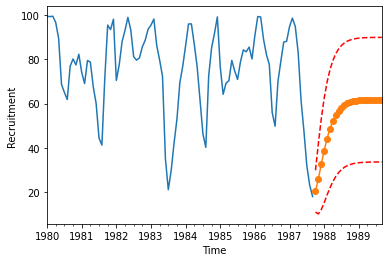

In [2]:
# Example 3.25
regr = sm.tsa.AutoReg(rec, lags=2).fit()
fore = regr.get_prediction(start=len(rec), end=len(rec) + 23)

rec["1980":].plot(xlabel="Time", ylabel="Recruitment", legend=False)
fore.predicted_mean.plot(marker="o")
plt.plot(fore.predicted_mean + fore.se_mean, color="red", linestyle="--")
plt.plot(fore.predicted_mean - fore.se_mean, color="red", linestyle="--")
plt.show()

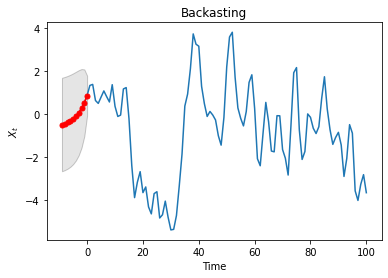

In [3]:
# Example 3.26
np.random.seed(90210)
x = sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, .5], nsample=100)
xr = np.flip(x) # xr is the reversed data
pxr = sm.tsa.arima.ARIMA(xr, order=(1, 0, 1), enforce_stationarity=False, enforce_invertibility=False).fit().get_prediction(len(x), len(x) + 9) # predict the reversed data
pxrp = np.flip(pxr.predicted_mean) # reorder the predictors (for plotting)
pxrse = np.flip(pxr.se_mean) # reorder the SEs
nx = pd.Series([*pxrp, *x], index=np.arange(-9, 101)) # attach the backcasts to the data

nx.plot(xlabel="Time", ylabel=r"$X_{t}$", title="Backasting")
nx.iloc[:10].plot(marker="o", color="red", markersize=5)
U = nx.iloc[:10] + pxrse; L = nx.iloc[:10] - pxrse
plt.fill_between(nx.index[:10], L, U, facecolor="gray", edgecolor="black", alpha=.2)
plt.show()